<a href="https://colab.research.google.com/github/kushiraj18/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52030_KUSHI_RAJ_KANCHU_PE_1(NORMAL_DISTRIBUTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

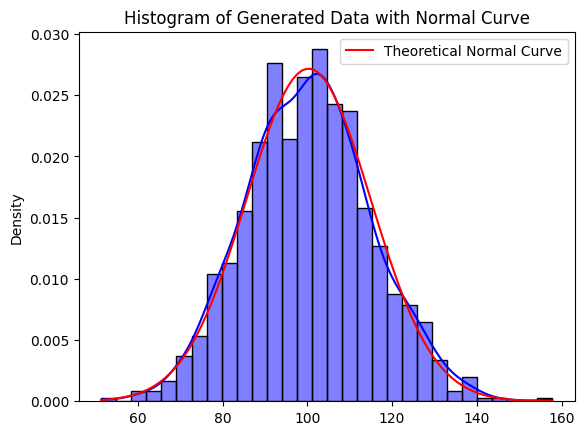

heart_rate - Mean: 80.71, Std: 9.97, Skewness: -0.05, Kurtosis: 0.05


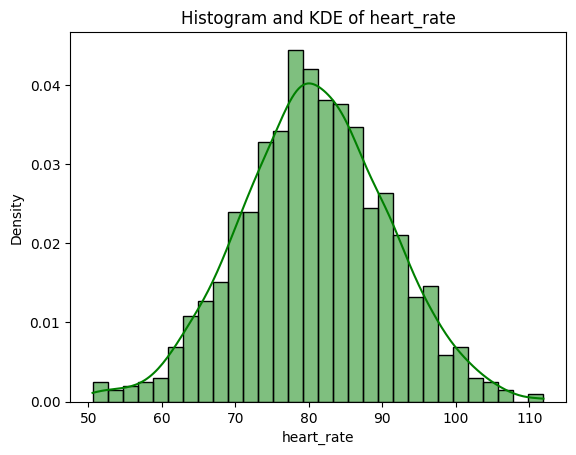

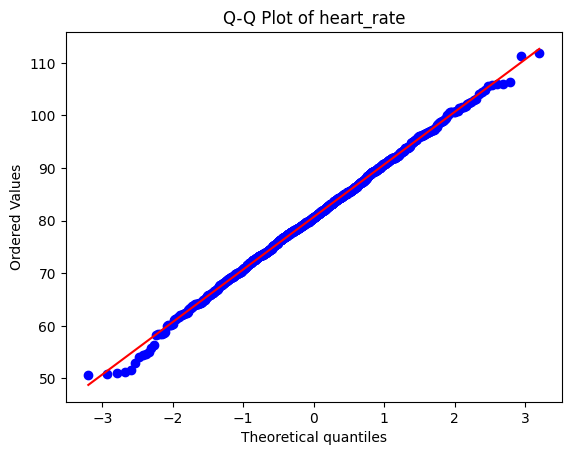

Shapiro-Wilk test: W=0.999, p=0.731
P(heart_rate < 80) = 0.472
90th percentile of heart_rate: 93.48
PDF at heart_rate = 100: 0.00615


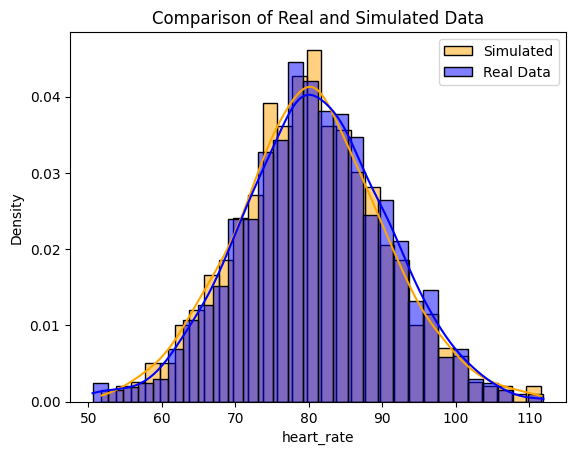

95% CI for heart_rate: (80.09045429048535, 81.32627045449775)
P(Systolic BP > 150) = 0.021


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, handling potential errors
file_path = "/content/PRESCRIPTIONS.csv"
try:
    # Use on_bad_lines instead of error_bad_lines
    df = pd.read_csv(file_path, on_bad_lines='skip', quoting=3)
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")

# Generate Normally Distributed Data
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)

# Plot Histogram
sns.histplot(data, kde=True, bins=30, color='blue', stat="density")

# Overlay Theoretical Normal Curve
x = np.linspace(min(data), max(data), 100)
pdf = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, pdf, 'r', label='Theoretical Normal Curve')
plt.legend()
plt.title("Histogram of Generated Data with Normal Curve")
plt.show()

# Assume MIMIC-III Data (synthetic example)
mimic_data = pd.DataFrame({
    "heart_rate": np.random.normal(loc=80, scale=10, size=1000),
    "systolic_bp": np.random.normal(loc=120, scale=15, size=1000),
    "diastolic_bp": np.random.normal(loc=80, scale=10, size=1000),
    "glucose": np.random.normal(loc=100, scale=20, size=1000)
})

# Select Variable (e.g., Heart Rate)
selected_var = "heart_rate"
selected_data = mimic_data[selected_var]

# Compute Summary Statistics
mean, std = np.mean(selected_data), np.std(selected_data)
skewness = stats.skew(selected_data)
kurtosis = stats.kurtosis(selected_data)
print(f"{selected_var} - Mean: {mean:.2f}, Std: {std:.2f}, Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")

# Check Normality - Histogram & KDE
sns.histplot(selected_data, kde=True, bins=30, color='green', stat="density")
plt.title(f"Histogram and KDE of {selected_var}")
plt.show()

# Q-Q Plot
stats.probplot(selected_data, dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {selected_var}")
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(selected_data)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p={shapiro_test.pvalue:.3f}")

# Compute Probability (pnorm equivalent)
prob_less_than_80 = stats.norm.cdf(80, mean, std)
print(f"P({selected_var} < 80) = {prob_less_than_80:.3f}")

# Compute 90th Percentile (qnorm equivalent)
quantile_90 = stats.norm.ppf(0.90, mean, std)
print(f"90th percentile of {selected_var}: {quantile_90:.2f}")

# Compute Probability Density (dnorm equivalent)
pdf_100 = stats.norm.pdf(100, mean, std)
print(f"PDF at {selected_var} = 100: {pdf_100:.5f}")

# Generate Normal Distribution (rnorm equivalent)
simulated_data = np.random.normal(mean, std, 1000)

# Compare Distributions
sns.histplot(simulated_data, kde=True, bins=30, color='orange', stat="density", label="Simulated")
sns.histplot(selected_data, kde=True, bins=30, color='blue', stat="density", label="Real Data", alpha=0.5)
plt.legend()
plt.title("Comparison of Real and Simulated Data")
plt.show()

# Compute 95% Confidence Interval
conf_interval = stats.norm.interval(0.95, mean, std/np.sqrt(len(selected_data)))
print(f"95% CI for {selected_var}: {conf_interval}")

# Probability of Systolic BP > 150
prob_sbp_greater_150 = 1 - stats.norm.cdf(150, np.mean(mimic_data["systolic_bp"]), np.std(mimic_data["systolic_bp"]))
print(f"P(Systolic BP > 150) = {prob_sbp_greater_150:.3f}")